## DBSCAN clustering

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics

In [2]:
# Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [3]:
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heartdisease_df.shape

(303, 14)

### Prep Data

In [4]:
# The dataset needs some preprocessing. So, apply the following code before working with the dataset:

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [5]:
# Standarizing the features since
# Clustering algorithms are sensitive
# the the variable scale of the metrics 
# that are used to analyze similarity

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible:
1. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?
1. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [28]:
# adjust min_samples parameter

min_samples = []
cluster_count_min_samples = []

for i in range(1,11,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=1, min_samples=i)
    min_samples.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    cluster_count_min_samples.append(len(set(clusters)) - (1 if -1 in clusters else 0))
    
cluster_count_min_samples

[294, 8, 1, 0, 0, 0, 0, 0, 0, 0]

As min_samples increases cluster count decreases.

In [71]:
# adjust eps parameter

eps = []
cluster_count_eps = []
eps_ari = []
eps_sil = []

for i in range(1,11,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=i, min_samples=1)
    eps.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    cluster_count_eps.append(len(set(clusters)) - (1 if -1 in clusters else 0))
    eps_ari.append(metrics.adjusted_rand_score(y, clusters))
    eps_sil.append(metrics.silhouette_score(X_std, clusters, metric='euclidean'))
    
cluster_count_eps

[294, 178, 34, 3, 1, 1, 1, 1, 1, 1]

As eps increases, cluster count decreases.  However it never goes below 1.

In [66]:
# combine results
pd.DataFrame(data= {'min_samples': cluster_count_min_samples,
                      'eps': cluster_count_eps},
            index=range(1,11,1))

,min_samples,eps
1,294,294
2,8,178
3,1,34
4,0,3
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1
10,0,1


Text(0, 0.5, 'Clusters')

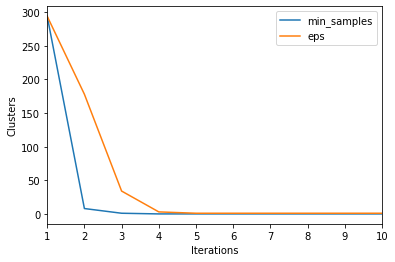

In [62]:
pd.DataFrame(data= {'min_samples': cluster_count_min_samples,
                      'eps': cluster_count_eps},
            index=range(1,11,1)).plot()
plt.xlabel('Iterations')
plt.ylabel('Clusters')

### Examine ARI and Silhouette Score at different settings of min_samples and eps

In [30]:
# adjust min_samples parameter

min_samples_ari = []
min_samples_sil = []

for i in range(1,4,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=1, min_samples=i)
    min_samples.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    min_samples_ari.append(metrics.adjusted_rand_score(y, clusters))
    min_samples_sil.append(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

In [31]:
# adjust eps parameter

eps_ari = []
eps_sil = []

for i in range(1,5,1):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=i, min_samples=1)
    eps.append(i)
    
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    eps_ari.append(metrics.adjusted_rand_score(y, clusters))
    eps_sil.append(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

Text(0, 0.5, 'Score')

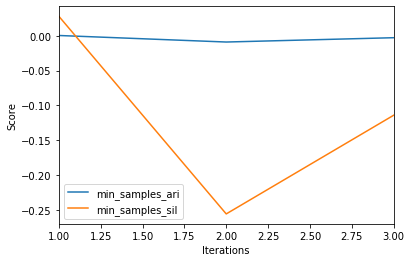

In [27]:
# combine results
pd.DataFrame(data= {'min_samples_ari': min_samples_ari,
                    'min_samples_sil': min_samples_sil},
                    index=range(1, len(min_samples_ari)+1, 1)).plot()

plt.xlabel('Iterations')
plt.ylabel('Score')

Adjusting min_samples did not help scores.

Text(0, 0.5, 'Score')

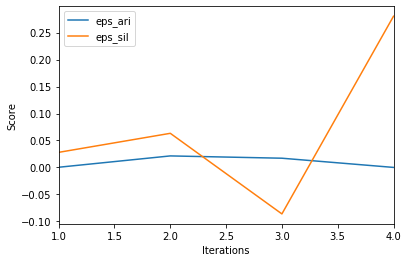

In [24]:
# combine results
pd.DataFrame(data= {'eps_ari': eps_ari,
                    'eps_sil': eps_sil},
                    index=range(1, len(eps_ari)+1, 1)).plot()

plt.xlabel('Iterations')
plt.ylabel('Score')

Adjusting eps helped scores more than min_samples.

### Examine clusters of eps adjusted to 3

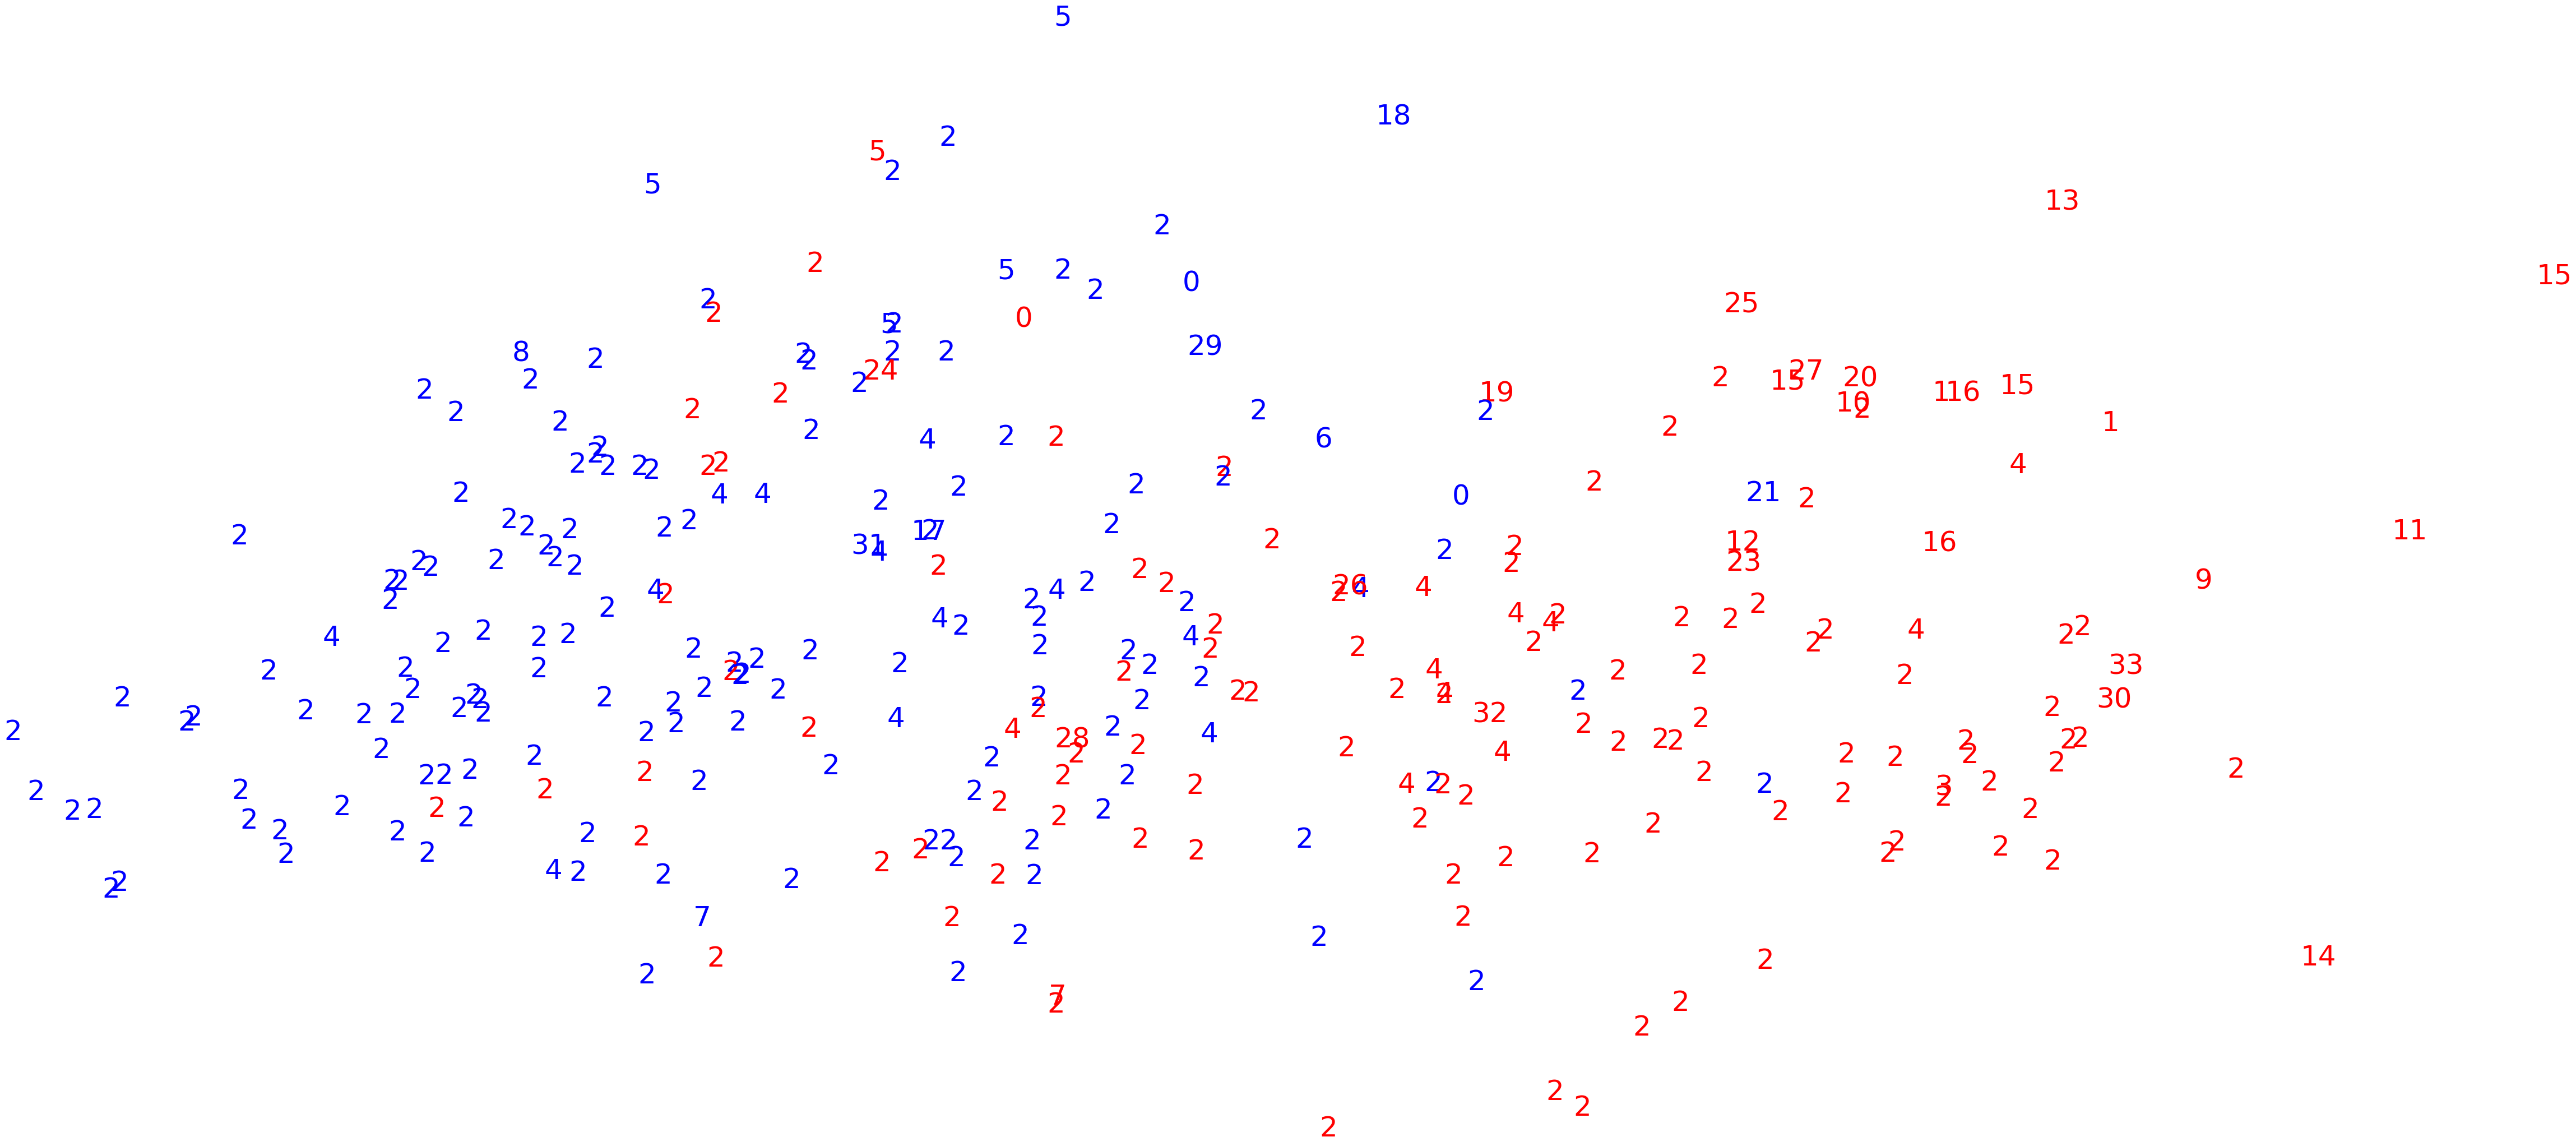

In [63]:
dbscan_cluster = DBSCAN(eps=3, min_samples=1)
clusters = dbscan_cluster.fit_predict(X_std)

# visualize results
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Examine clusters of min_samples adjusted to 2

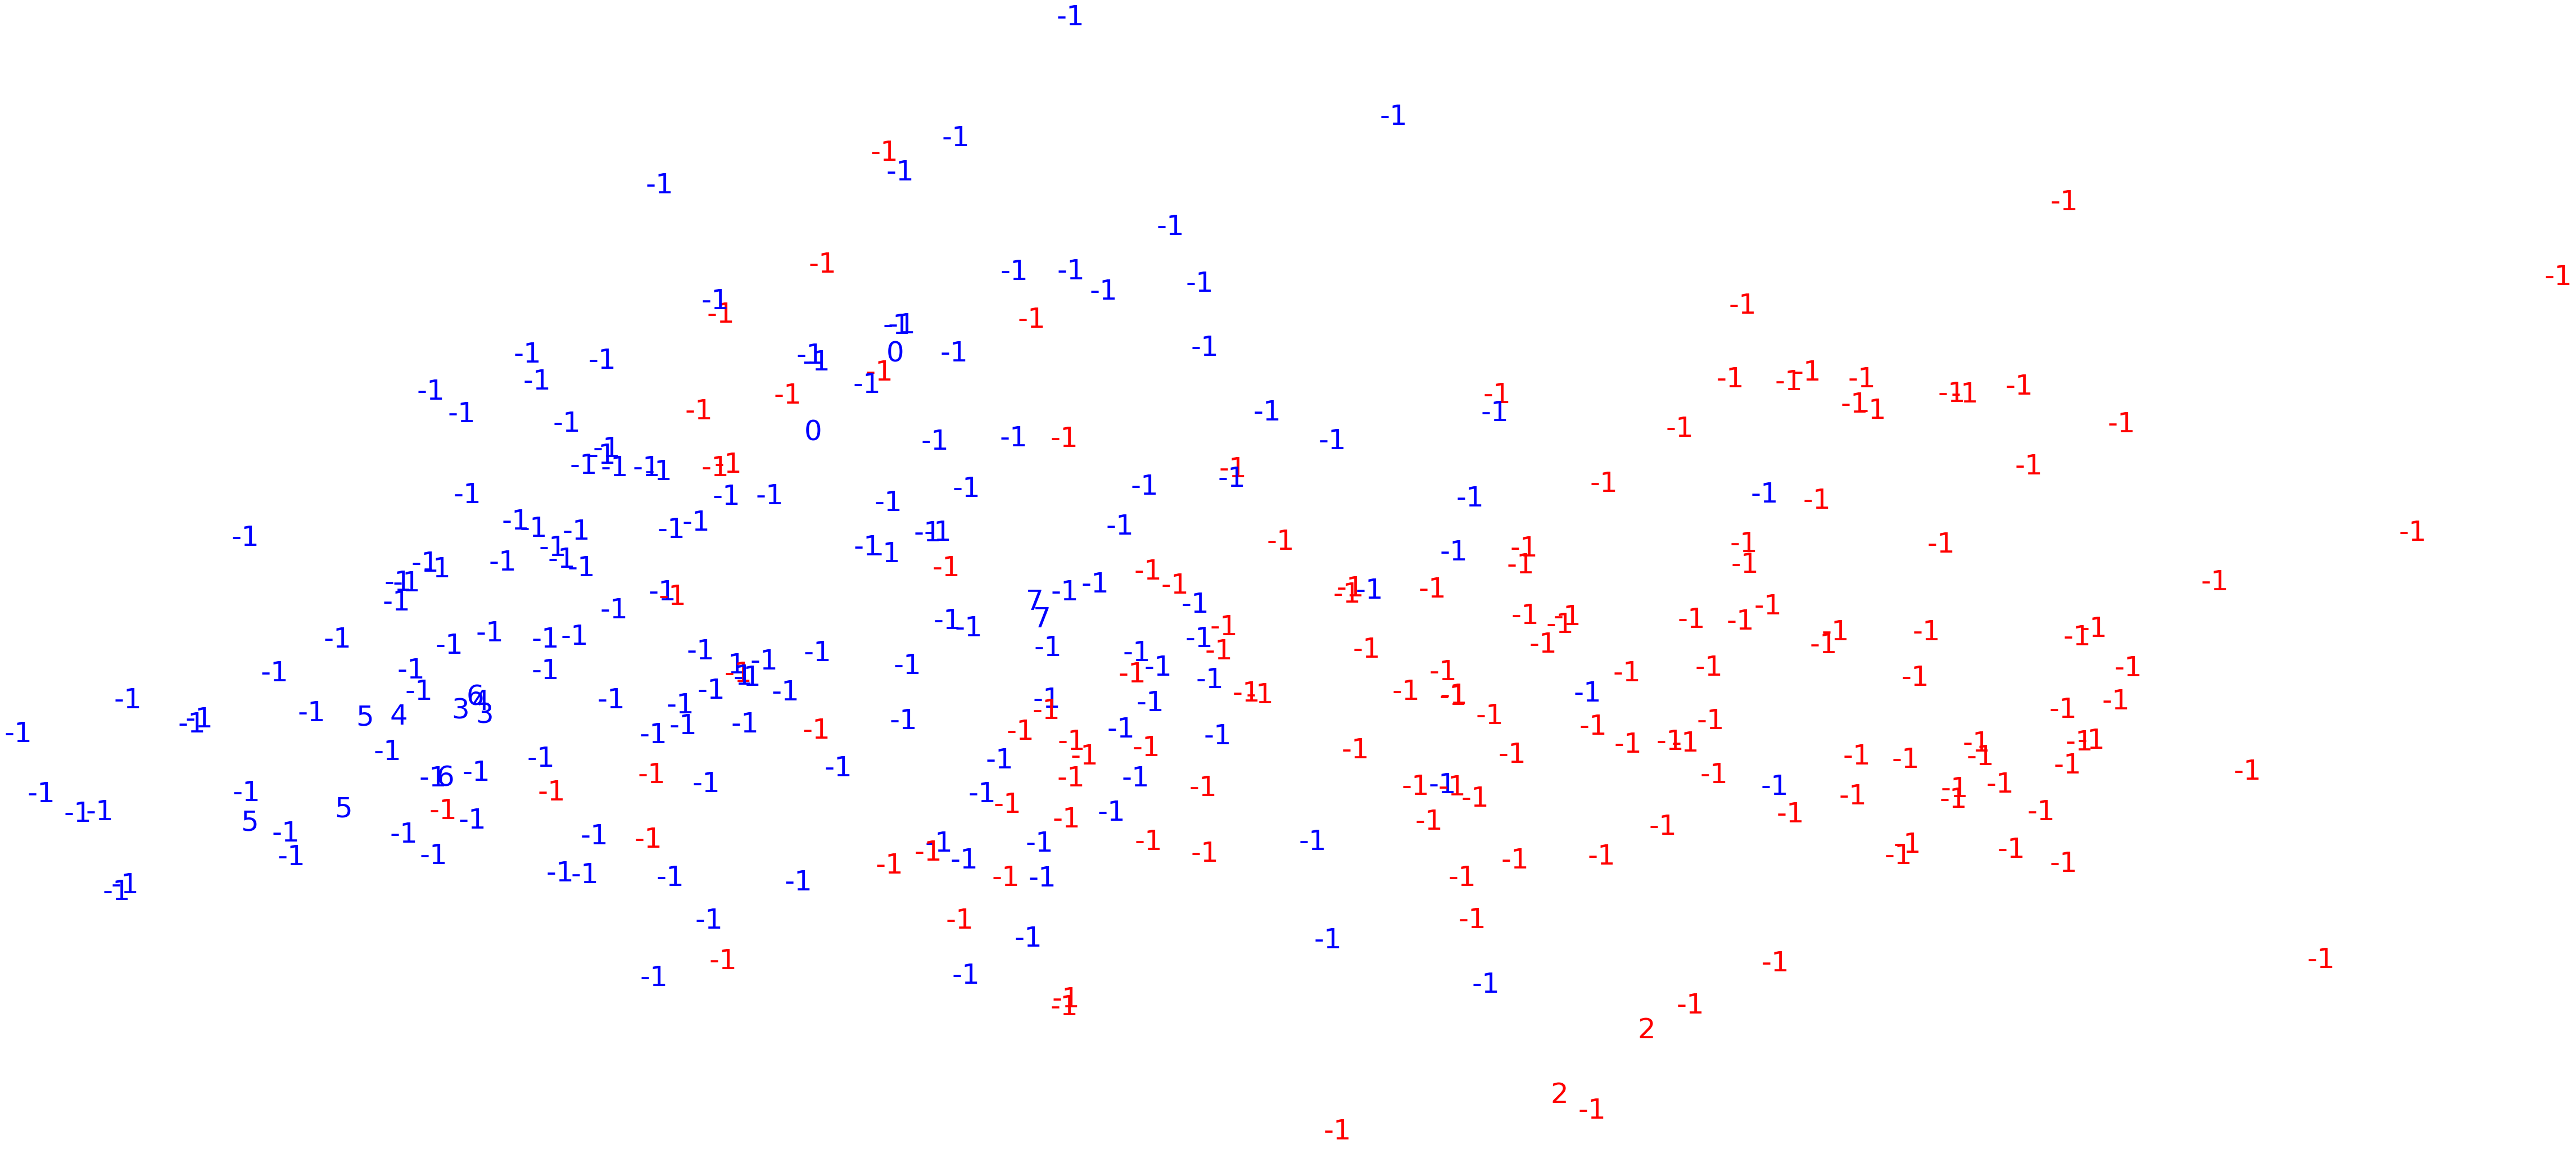

In [65]:
dbscan_cluster = DBSCAN(eps=1, min_samples=2)
clusters = dbscan_cluster.fit_predict(X_std)

# visualize results
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()